In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
sys.path.append("../")
from consts import CLEAN_SCRAPE_DIR, BEFORE_2010_DIR, IN_2010S, AFTER_2020
TARGET_DIR = CLEAN_SCRAPE_DIR

In [3]:
df = pd.read_csv(f"./parsed_metadata/{TARGET_DIR}/meta_en_prime.csv")

In [10]:
df.head()

,file,synopsis,genres,amazon_rating,global_ratings,error,imdb-rating-badge,runtime-badge,release-year-badge,x-ray-badge,hdr-badge,uhd-badge,rating-badge,link
0,0_My_Fault.html,"Noah must leave her town, boyfriend and friend...","Drama,Young Adult Audience",Rated 4.7 out of 5 stars by 788 Amazon customers.,788,1,IMDb 6.3,1 h 57 min,2023.0,X-Ray,HDR,UHD,16+,/gp/video/detail/B0B683GB78/ref=atv_dp_atf_pri...
1,1000_On_The_Trail_of_UFOS_Dark_Sky.html,On the Trail of UFOs: Dark Sky traces decades ...,Documentary,Rated 3.7 out of 5 stars by 407 Amazon customers.,407,1,IMDb 5.7,1 h 25 min,2021.0,X-Ray,NaN,NaN,13+,/gp/video/detail/B09BKF2WGQ/ref=atv_dp_atf_pri...
2,1001_Student_Of_The_Year.html,"Introducing Alia Bhatt (Sharanya Singhania), S...","Comedy,Sports,Romance",Rated 3.7 out of 5 stars by 60 Amazon customers.,60,1,IMDb 5.2,2 h 25 min,2012.0,X-Ray,NaN,NaN,13+,/gp/video/detail/B0BZTD87WK/ref=atv_dp_atf_pri...
3,1002_Pussycat_Pussycat_I_Love_You.html,"An American playwright living in Rome, fearing...",Comedy,Rated 3 out of 5 stars by 11 Amazon customers.,11,1,IMDb 4.5,1 h 40 min,1970.0,NaN,NaN,NaN,R,/gp/video/detail/B009P8K2TW/ref=atv_dp_atf_pri...
4,1003_Severed_Ways.html,"On the coast of North America in AD 1007, two ...","Adventure,Action",Rated 2.9 out of 5 stars by 131 Amazon customers.,131,1,IMDb 4.3,1 h 49 min,2007.0,NaN,NaN,NaN,16+,/gp/video/detail/B002JXRSOW/ref=atv_dp_atf_pri...


In [11]:
df.columns

Index(['file', 'synopsis', 'genres', 'amazon_rating', 'global_ratings',
       'error', 'imdb-rating-badge', 'runtime-badge', 'release-year-badge',
       'x-ray-badge', 'hdr-badge', 'uhd-badge', 'rating-badge', 'link'],
      dtype='object')

### Cleaning

We need to ensure that we don't have any entries with no links. These entries are usually movies that are not included with prime.

In [12]:
df_links = df[~df['link'].isnull()]

In [7]:
df[df['link'].isnull()].to_csv("check.csv")

In [13]:
df.shape, df_links.shape

((6351, 14), (6322, 14))

Evaluate missing x-ray data

C:\Users\safal\AppData\Local\Temp\ipykernel_9516\3942016705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered1['release-year-badge'] = df_filtered1['release-year-badge'].astype(int)


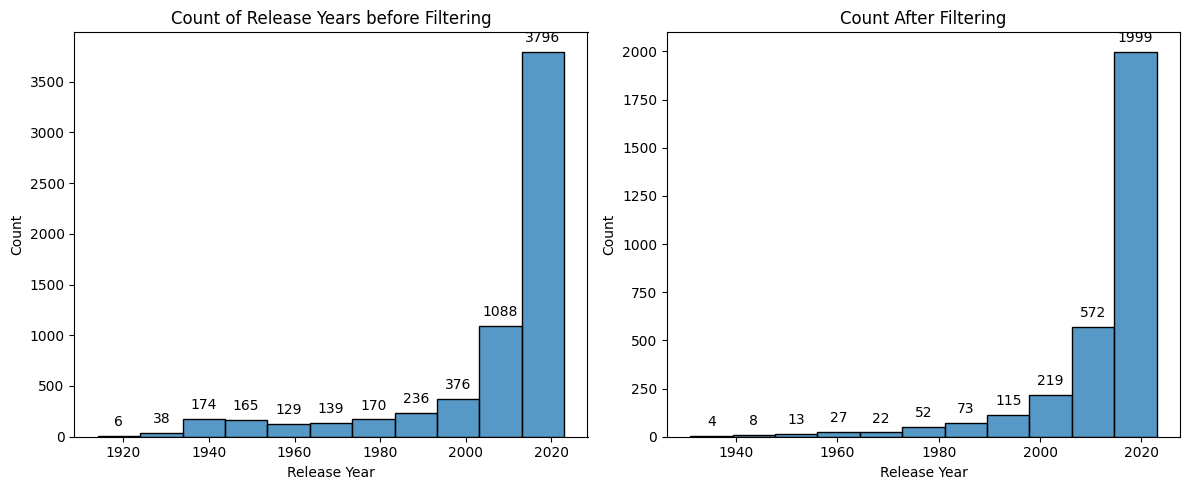

In [9]:
# Assuming df_links is your DataFrame and 'release-year-badge' is the column of interest
df_filtered1 = df_links[~df_links['release-year-badge'].isnull()]
# Convert 'release-year-badge' to integer type
df_filtered1['release-year-badge'] = df_filtered1['release-year-badge'].astype(int)
# df_filtered = df_filtered1[(df_filtered1['x-ray-badge'].isnull())]


# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot 1: Countplot
ax1 = sns.histplot(x='release-year-badge', data=df_filtered1, ax=axes[0], bins=11)
ax1.set_title('Count of Release Years before Filtering')
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Count')

# Add count annotations to the first plot
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot 2: Another Countplot (you can modify this based on your second plot)
ax2 = sns.histplot(x='release-year-badge', data=df_filtered1[~df_filtered1['x-ray-badge'].isnull()], ax=axes[1], bins=11)
ax2.set_title('Count After Filtering')
ax2.set_xlabel('Release Year')
ax2.set_ylabel('Count')

# Add count annotations to the second plot
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

Now, we need to remove all entries that don't have Xray data, as indicated by the x-ray-badge field

In [17]:
df_xrays = df_links[~df_links['x-ray-badge'].isnull()]

In [18]:
df_xrays.head()

,file,synopsis,genres,amazon_rating,global_ratings,error,imdb-rating-badge,runtime-badge,release-year-badge,rating-badge,link,x-ray-badge,uhd-badge,hdr-badge
6,1006_The_Spectaculars.html,Ed Lima is an egocentric stand-up comedian who...,"Comedy,Drama",NaN,NaN,1,IMDb 5.8,1 h 27 min,2020,16+,/gp/video/detail/B08LYGVGZJ/ref=atv_dp_atf_pri...,X-Ray,NaN,NaN
13,1013_Dongri_Danger.html,"Dawood, Gangsters, Mayyat and Rahul, these are...",Comedy,Rated 3.6 out of 5 stars by 11 Amazon customers.,11,1,IMDb 4.9,56min,2022,16+,/gp/video/detail/B09Q2BH23G/ref=atv_dp_atf_pri...,X-Ray,UHD,NaN
32,1032_LA_GORDA_FABIOLA_MODEL_63.html,"Health problems, overweight, children and the ...",Comedy,Rated 5 out of 5 stars by 1 Amazon customers.,1,1,NaN,45min,2022,16+,/gp/video/detail/B09WXSDQST/ref=atv_dp_atf_pri...,X-Ray,UHD,HDR
42,1042_Ashish_Shakya__Life_Is_Good.html,Ashish Shakya aka 'That AIB Guy' aka 'Hai Dear...,Comedy,Rated 3.7 out of 5 stars by 9 Amazon customers.,9,1,IMDb 4.6,54min,2020,18+,/gp/video/detail/B0846CJJS8/ref=atv_dp_atf_pri...,X-Ray,NaN,NaN
70,1070_Baggy_in__as_KungFu_Bonda_A_Mostly_Englis...,Baggy takes you on a hilarious journey about g...,"Comedy,Arts, Entertainment, and Culture",Rated 2.9 out of 5 stars by 10 Amazon customers.,10,1,IMDb 5.4,1 h 17 min,2020,16+,/gp/video/detail/B0877TMV6K/ref=atv_dp_atf_pri...,X-Ray,UHD,NaN


In [20]:
if not os.path.exists(f"./metadata_with_xray/{TARGET_DIR}"): os.mkdir(f"./metadata_with_xray/{TARGET_DIR}")
df_xrays.to_csv(f'./metadata_with_xray/{TARGET_DIR}/meta_en_prime.csv', index=False)

In [21]:
(len(df_links['x-ray-badge']) - df_links['x-ray-badge'].isnull().sum()) / len(df_links['x-ray-badge'])

0.24055829228243022

In [22]:
len(df_links['x-ray-badge']) - df_links['x-ray-badge'].isnull().sum()

293